In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from keras.datasets import cifar10 


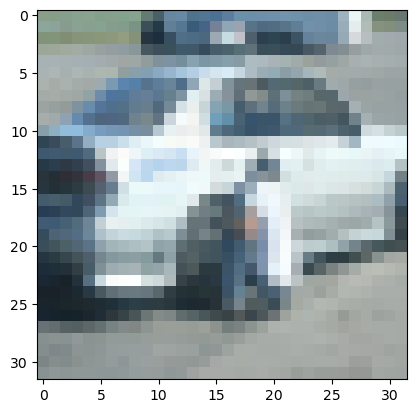

In [2]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data() 
i = 30009 
plt.imshow(X_train[i]) 


In [3]:
print(y_train[i]) 


[1]


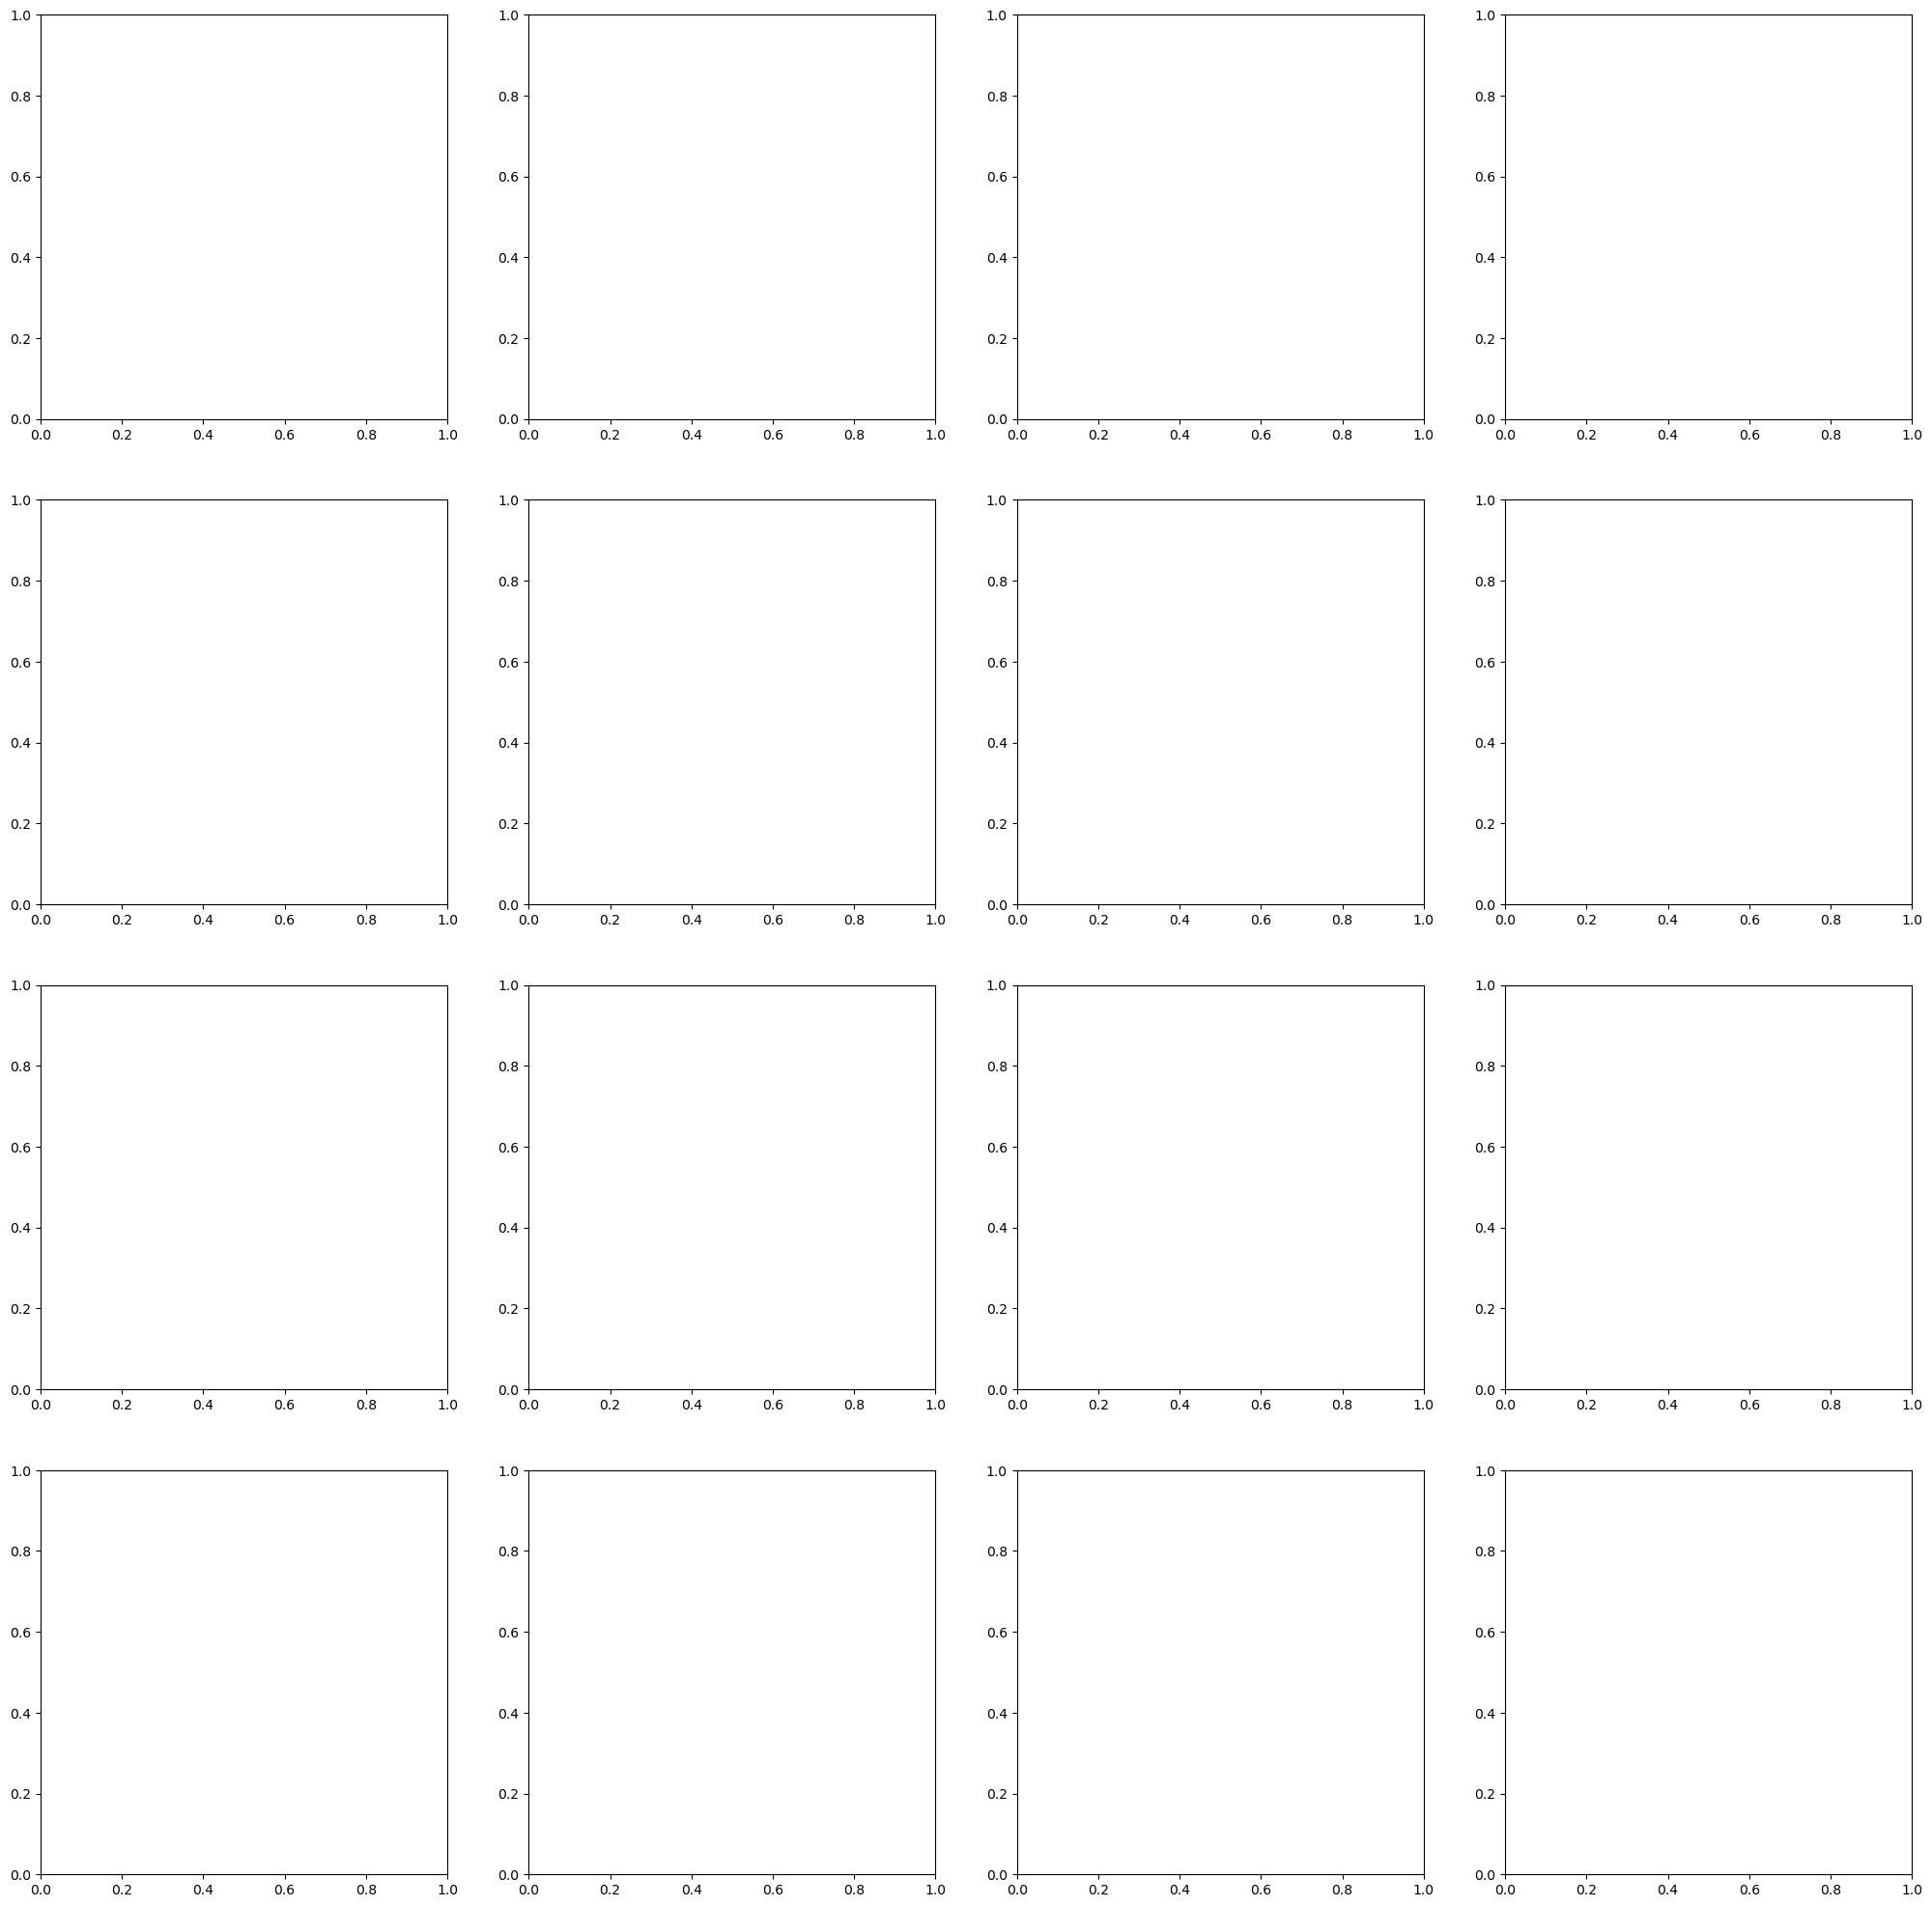

In [6]:
W_grid = 4 
L_grid = 4 
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) 


In [8]:
axes = axes.ravel() 
n_training = len(X_train) 


In [9]:
for i in np.arange(0, L_grid * W_grid): 
    index = np.random.randint(0, n_training)

In [10]:
axes[i].imshow(X_train[index]) 


In [11]:
axes[i].set_title(y_train[index]) 


/Users/prathamhandique/Downloads/anaconda3/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[8]')

In [12]:
axes[i].axis('off') 


(-0.5, 31.5, 31.5, -0.5)

In [13]:
plt.subplots_adjust(hspace = 0.4) 


<Figure size 640x480 with 0 Axes>

In [14]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
number_cat = 10 


In [16]:
from keras.utils import to_categorical


y_train = to_categorical(y_train, number_cat)
y_test = to_categorical(y_test, number_cat)


X_train = X_train / 255
X_test = X_test / 255


In [17]:
Input_shape = X_train.shape[1:] 


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 109ms/step - accuracy: 0.2859 - loss: 1.9273
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5429 - loss: 1.3249
Test Accuracy: 0.5397999882698059
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step


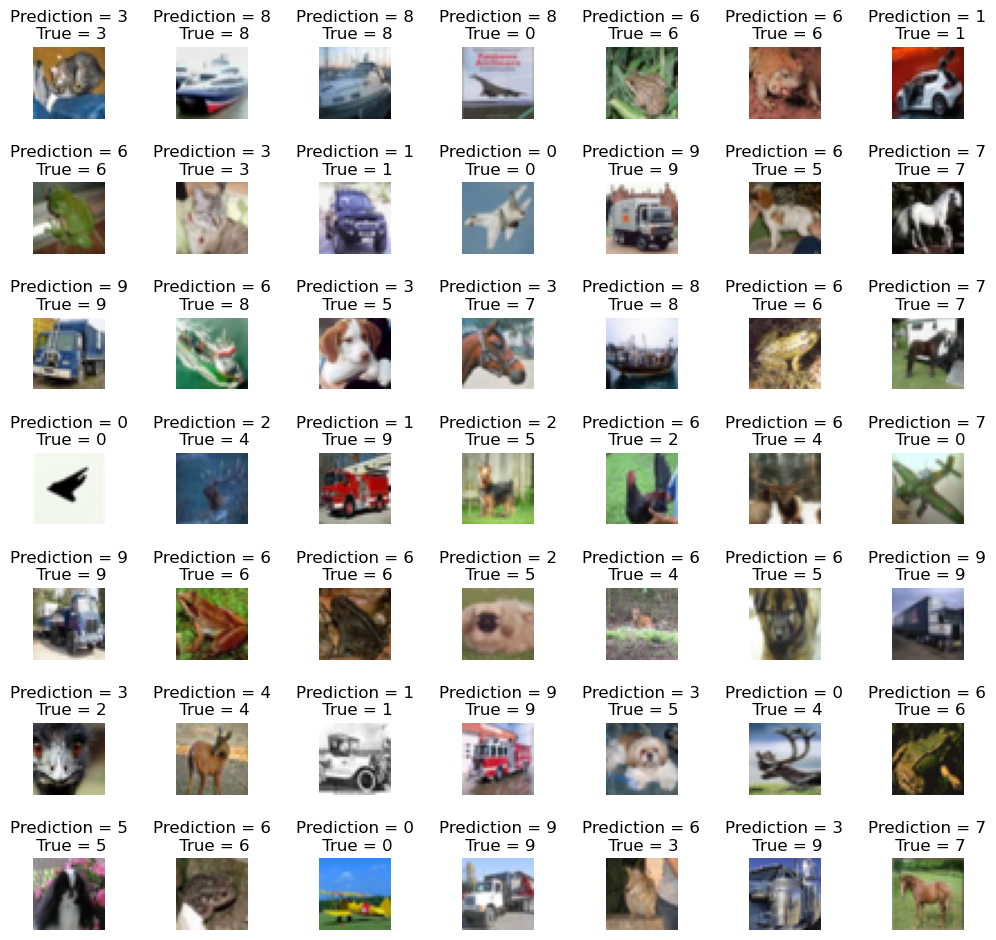

In [22]:
cnn_model = Sequential() 
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=Input_shape)) 
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
cnn_model.add(MaxPooling2D(2,2)) 
cnn_model.add(Dropout(0.4)) 
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu')) 
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu')) 
cnn_model.add(MaxPooling2D(2,2)) 
cnn_model.add(Dropout(0.4)) 
cnn_model.add(Flatten()) 
cnn_model.add(Dense(units=1024, activation='relu')) 
cnn_model.add(Dense(units=1024, activation='relu')) 
cnn_model.add(Dense(units=10, activation='softmax')) 
cnn_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=1, shuffle=True) 
evaluation = cnn_model.evaluate(X_test, y_test) 
print('Test Accuracy: {}'.format(evaluation[1])) 

# Making predictions
predicted_classes = cnn_model.predict(X_test)  
classes_x = np.argmax(predicted_classes, axis=1) 
y_test = y_test.argmax(1) 
L = 7 
W = 7 
fig, axes = plt.subplots(L, W, figsize=(12, 12)) 
axes = axes.ravel() 
for i in np.arange(0, L*W): 
    axes[i].imshow(X_test[i]) 
    axes[i].set_title('Prediction = {}\n True = {}'.format(classes_x[i], y_test[i])) 
    axes[i].axis('off') 
plt.subplots_adjust(wspace=1) 


<Axes: >

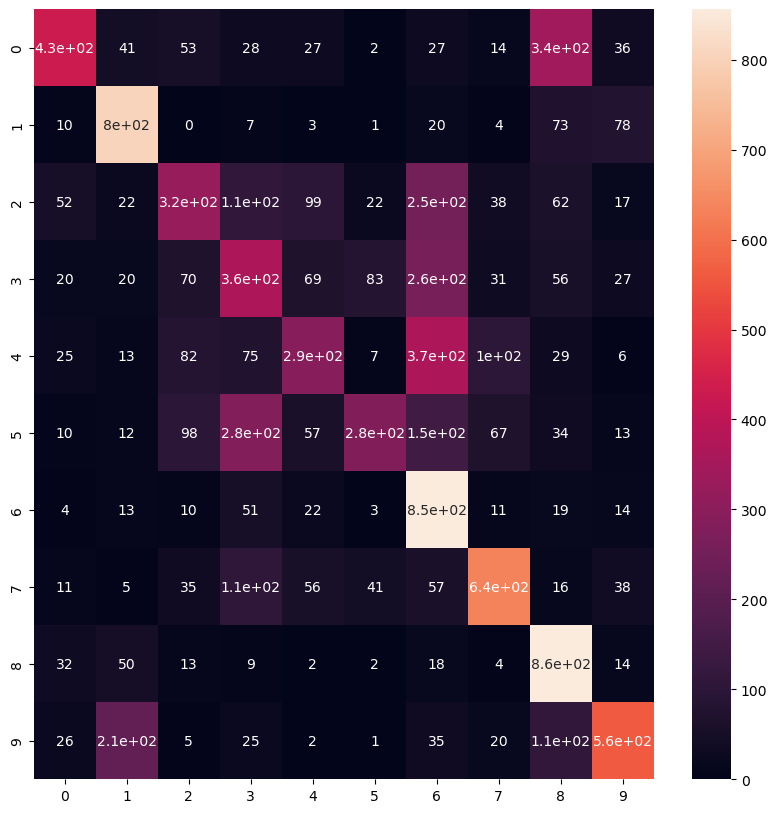

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, classes_x) 
plt.figure(figsize=(10, 10)) 
sns.heatmap(cm, annot=True) 


In [32]:
import os
directory = os.path.join(os.getcwd(), 'saved_models') 
if not os.path.isdir(directory): 
    os.makedirs(directory) 
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5') 
cnn_model.save(model_path)

In [38]:
import keras 
from keras.datasets import cifar10 
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 
 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
 
n = 8  
X_train_sample = X_train[:n] 


In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(brightness_range=(1,3)) 
dataget_train.fit(X_train_sample) 


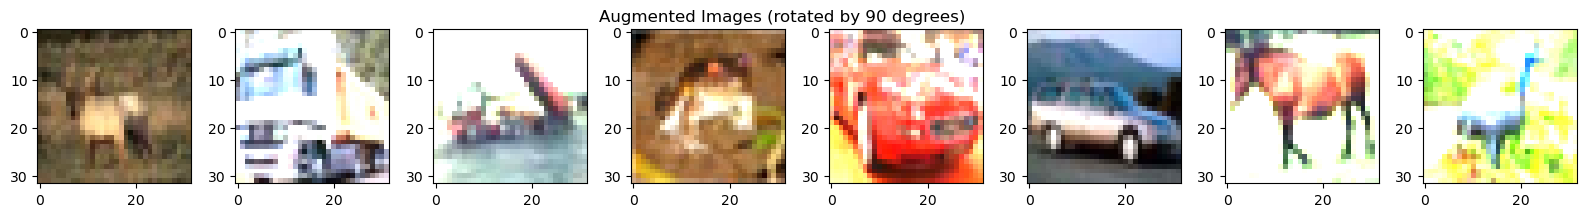

In [42]:
from PIL import Image 
fig = plt.figure(figsize=(20,2)) 
for x_batch in dataget_train.flow(X_train_sample,batch_size=n): 
    for i in range(0,n): 
        ax=fig.add_subplot(1,n,i+1) 
        ax.imshow(Image.fromarray(np.uint8(x_batch[i]))) 
    fig.suptitle('Augmented Images (rotated by 90 degrees)') 
    plt.show() 
    break 


In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import tensorflow as tf
import os

datagen = ImageDataGenerator( 
    rotation_range = 90, 
    width_shift_range = 0.1, 
    horizontal_flip = True, 
    vertical_flip = True 
)

datagen.fit(X_train) 

# Replace fit_generator with fit
cnn_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=2) 

score = cnn_model.evaluate(X_test, y_test) 
print('Test accuracy', score[1])
directory = os.path.join(os.getcwd(), 'saved_models') 
if not os.path.isdir(directory): 
    os.makedirs(directory) 
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5') 
cnn_model.save(model_path)


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 176s 112ms/step - accuracy: 0.4647 - loss: 1.5178
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - accuracy: 0.4806 - loss: 1.4799
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5292 - loss: 1.3151


Test accuracy 0.5289000272750854
